In [167]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.naive_bayes import (
    GaussianNB,
    MultinomialNB,
    BernoulliNB,
    CategoricalNB,
    ComplementNB,
)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns

sns.set()


In [168]:
data = datasets.load_breast_cancer()

In [169]:
X = data.data[:, :2]
y = data.target


In [170]:
df = pd.DataFrame(data.data[:, :2], columns=data.feature_names[:2])
df["target"] = data.target
df["target"].value_counts()


target
1    357
0    212
Name: count, dtype: int64

<Axes: xlabel='mean radius', ylabel='mean texture'>

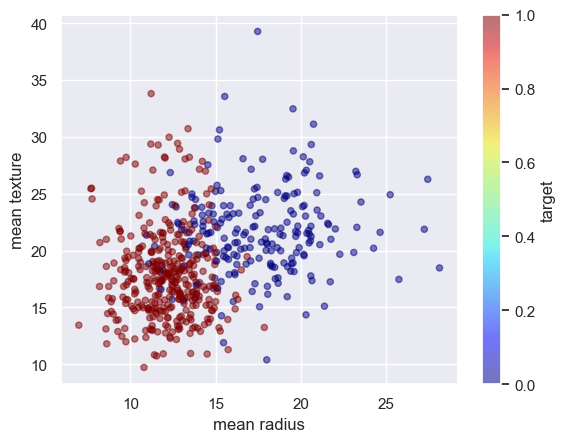

In [171]:
df.plot.scatter(*df.columns[:2], c="target", cmap="jet", alpha=0.5)

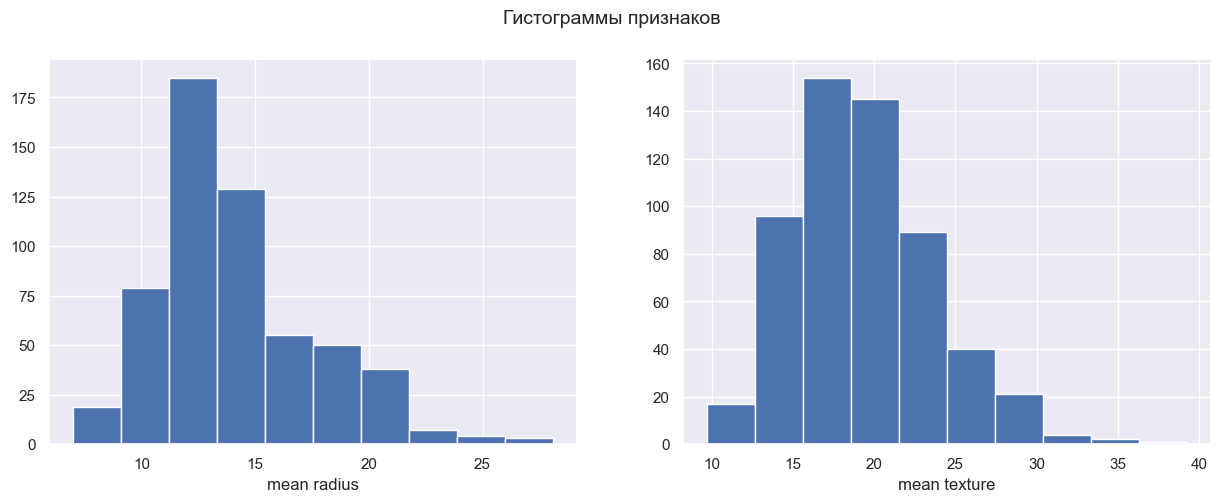

In [172]:
plt.figure(figsize=(15, 5))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle("Гистограммы признаков", fontsize=14)
plt.show()


In [173]:
gaussian_nb = GaussianNB()

In [174]:
gaussian_nb.fit(X, y)

GaussianNB()

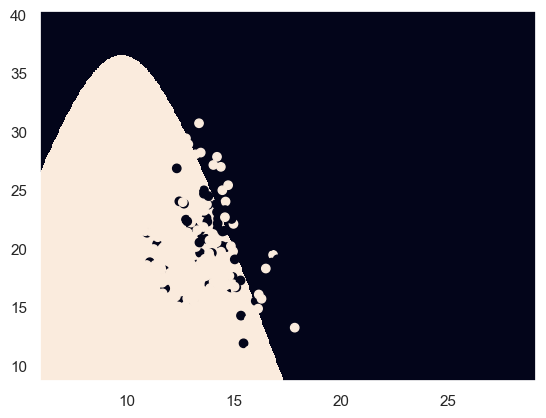

In [175]:
X0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, X.shape[0])
X1 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = gaussian_nb.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(
    X0_grid.shape
)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y, linewidth=1)


In [176]:
y_pred = gaussian_nb.predict(X)

In [177]:
print(confusion_matrix(y, y_pred))
print("Accuracy= ", accuracy_score(y, y_pred))
print("F1_score= ", f1_score(y, y_pred))


[[164  48]
 [ 17 340]]
Accuracy=  0.8857644991212654
F1_score=  0.912751677852349


In [178]:
X = data.data
y = data.target
X.shape, y.shape


((569, 30), (569,))

In [179]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
df["target"].value_counts()


target
1    357
0    212
Name: count, dtype: int64

In [180]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print("Accuracy= ", accuracy_score(y, y_pred))
print("F1_score= ", f1_score(y, y_pred))


[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917469


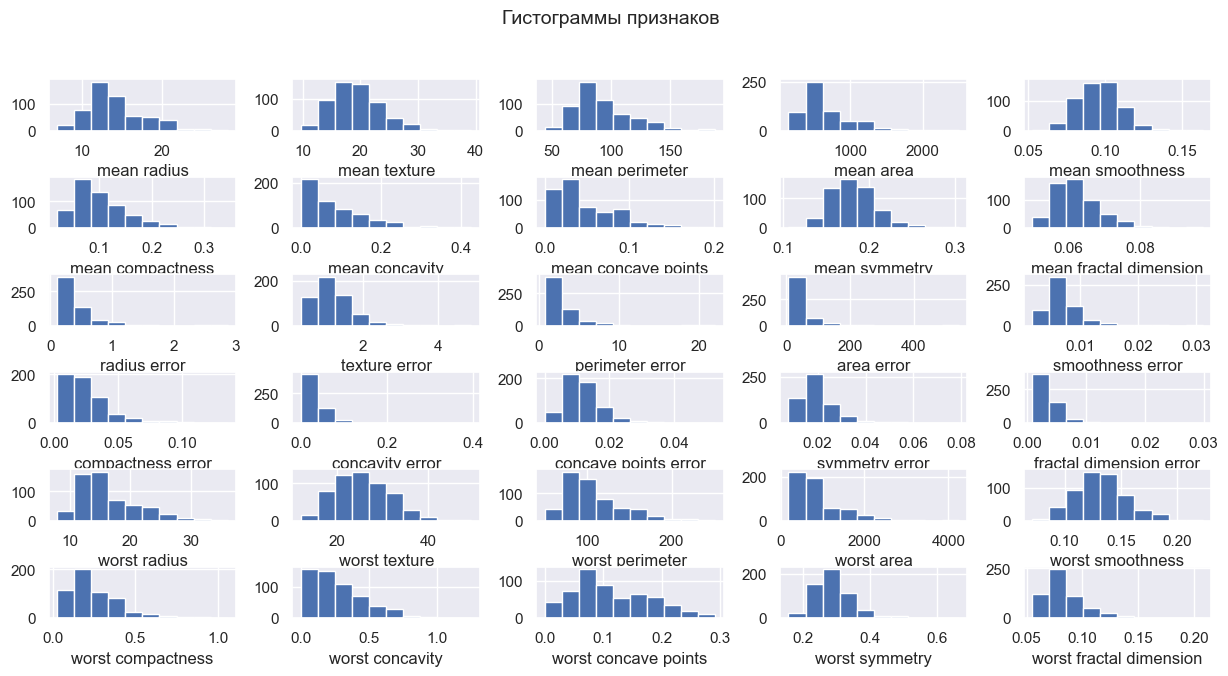

In [181]:
f = plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.hist(X[:, i])

    plt.xlabel(data.feature_names[i])
f.subplots_adjust(hspace=0.9, wspace=0.3)
plt.suptitle("Гистограммы признаков", fontsize=14)
plt.show()


In [182]:
df = df.drop(
    [
        "mean concavity",
        "radius error",
        "perimeter error",
        "area error",
        "compactness error",
        "concavity error",
        "fractal dimension error",
        "worst area",
        "worst concavity",
    ],
    axis=1,
)
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,texture error,...,symmetry error,worst radius,worst texture,worst perimeter,worst smoothness,worst compactness,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,...,0.03003,25.38,17.33,184.60,0.1622,0.6656,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,...,0.01389,24.99,23.41,158.80,0.1238,0.1866,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,...,0.02250,23.57,25.53,152.50,0.1444,0.4245,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,...,0.05963,14.91,26.50,98.87,0.2098,0.8663,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,...,0.01756,22.54,16.67,152.20,0.1374,0.2050,0.1625,0.2364,0.07678,0


In [183]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print("Accuracy= ", accuracy_score(y, y_pred))
print("F1_score= ", f1_score(y, y_pred))


[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917469


---
На использованном в работе наборе данных примените другие вариации модели наивного Байеса - Мультономиальный, Бернулли, категориальные и комплементарный. Для каждой модели сделайте вывод о ее применимости.


In [184]:
for class_model in [MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB]:
    print(class_model.__name__)
    gaussian_nb = class_model()
    gaussian_nb.fit(X, y)
    y_pred = gaussian_nb.predict(X)
    print("  Accuracy = ", accuracy_score(y, y_pred))
    print("  F1_score = ", f1_score(y, y_pred))
    print()


MultinomialNB
  Accuracy =  0.8963093145869947
  F1_score =  0.9216467463479415

BernoulliNB
  Accuracy =  0.6274165202108963
  F1_score =  0.7710583153347732

CategoricalNB
  Accuracy =  0.9595782073813708
  F1_score =  0.9685362517099864

ComplementNB
  Accuracy =  0.8945518453427065
  F1_score =  0.9202127659574468



Все кроме `BernoulliNB` хорошо подходят

---
Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм расрпеделния эмпирических данных.


In [185]:
data = datasets.fetch_openml("titanic")

c:\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:322: UserWarning: Multiple active versions of the dataset matching the name titanic exist. Versions may be fundamentally different, returning version 2. Available versions:
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=40704
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=40945

  warn(warning_msg)


In [186]:
X = data.data.copy()
y = data.target.copy().astype(int)
X -= X.min()
X.shape, y.shape


((2201, 3), (2201,))

In [187]:
for class_model in [GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB]:
    print(class_model.__name__)
    gaussian_nb = class_model()
    gaussian_nb.fit(X, y)
    y_pred = gaussian_nb.predict(X)
    print("  Accuracy = ", accuracy_score(y, y_pred))
    print("  F1_score = ", f1_score(y, y_pred))
    print()


GaussianNB
  Accuracy =  0.773284870513403
  F1_score =  0.5991967871485944

MultinomialNB
  Accuracy =  0.6792367105860972
  F1_score =  0.13902439024390245

BernoulliNB
  Accuracy =  0.7782825988187188
  F1_score =  0.5885328836424958

CategoricalNB
  Accuracy =  0.7832803271240345
  F1_score =  0.6015037593984962

ComplementNB
  Accuracy =  0.7114947751022263
  F1_score =  0.4232515894641235



---
Загрузите набор данных о Титанике с сайта Kaggle. Обратите внимание на обилие категориальных переменных. Примените на нем наивный байесовский классификатор.

In [188]:
df = pd.read_csv("./train_and_test2.csv")

In [192]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [195]:
df = df.dropna()
X = df.drop("2urvived", axis=1)
y = df["2urvived"]


In [199]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print("Accuracy= ", accuracy_score(y, y_pred))
print("F1_score= ", f1_score(y, y_pred))


[[879  88]
 [140 200]]
Accuracy=  0.8255547054322877
F1_score=  0.6369426751592356


In [198]:
for class_model in [
    GaussianNB,
    MultinomialNB,
    BernoulliNB,
    CategoricalNB,
    ComplementNB,
]:
    print(class_model.__name__)
    gaussian_nb = class_model()
    gaussian_nb.fit(X, y)
    y_pred = gaussian_nb.predict(X)
    print("  Accuracy = ", accuracy_score(y, y_pred))
    print("  F1_score = ", f1_score(y, y_pred))
    print()


GaussianNB
  Accuracy =  0.8255547054322877
  F1_score =  0.6369426751592356

MultinomialNB
  Accuracy =  0.6916602907421576
  F1_score =  0.48133848133848134

BernoulliNB
  Accuracy =  0.7413925019127774
  F1_score =  0.4212328767123288

CategoricalNB
  Accuracy =  0.8607498087222647
  F1_score =  0.7129337539432177

ComplementNB
  Accuracy =  0.685539403213466
  F1_score =  0.4790874524714829

